# Smart Manufacturing

![Screenshot](throughput_time.JPG) 

Scenario: We have been given data from a spare parts manufacturing plant that uses Fabricating Machines, and skilled Operators to produce spare parts. These are small parts and they are produced in the 100's. The manufacturing plant wants to produce as many parts as possible quickly.

**Data:** We have given given 1 day's manufacturing data. There are 2 Machines (M1 and M2) and 5 human operators (O1...O5) and on this day 3 parts (P1, P2 and P3) were produced.

Both M1 and M2 have different rates of production, when they are running. However, they both require some set-up time, as well as `change over` time when switching between different parts. 

__Stoppages__ Throughout the day, these machines get stopped for various reasons. These NPT (non-productive times) are due to the following reasons:
1. Alarms (machine parts overheating, high vibrations)
2. Operator stops (humans stopping the machines, for taking a break, replacing raw etc.)
3. Change over (when switching from one Part to manufacturing another)



**Goal for this lesson**: Compare the throughputs of the different machines, compare part manufacturing difficulty and operator efficiencies, by looking at the data


![Screenshot](CumulativeFlow.png) 

### Preparatory Tasks

1. Read the input file
2. Format the data into a proper time series (with datetime) Timestamps and floats for the sensor values
3. Plot the number of parts produced with time as the x-axis (flat areas are stoppage times)

## Questions to be answered

- Q1: How does Machine M1 compare against M2 in terms of its production capacity?
- Q2: How do the 3 parts (P1, P2, P3) compare in terms of production complexity, based on this one day's data?
- Q3: How do the 5 operators compare, in terms of their individual production rates?
- Q4: What is the actual `realized` production rate, when taking into account all the stoppages?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

In [2]:
%matplotlib inline

#### Import the data set

In [3]:
data = pd.read_csv("smart_manufacturing_operator_machine_data.csv",sep=",",parse_dates=True)

In [5]:
data.head()

,Time,StopType,Operator,Part,NumberOfPieces,Machine
0,0:07:29.798441,Run,Op_2,P1,12483,M2
1,0:09:55.991285,Run,Op_1,P1,18988,M1
2,0:10:46.491958,Run,Op_1,P1,1793,M1
3,0:17:12.460362,ChangeOver,Op_1,P3,0,M1
4,0:21:34.147366,OpStop,Op_2,P1,0,M2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
Time              364 non-null object
StopType          364 non-null object
Operator          364 non-null object
Part              364 non-null object
NumberOfPieces    364 non-null int64
Machine           364 non-null object
dtypes: int64(1), object(5)
memory usage: 17.1+ KB


convert Time to datetime

In [7]:
#data['Time'] = pd.to_datetime(data['Time'])

In [8]:
data = data.iloc[0:-2,:]

In [9]:
data['Time'] = [datetime.datetime.strptime(data.Time[i],'%H:%M:%S.%f') for i in range(len(data.NumberOfPieces))]

In [10]:
data.head()

,Time,StopType,Operator,Part,NumberOfPieces,Machine
0,1900-01-01 00:07:29.798441,Run,Op_2,P1,12483,M2
1,1900-01-01 00:09:55.991285,Run,Op_1,P1,18988,M1
2,1900-01-01 00:10:46.491958,Run,Op_1,P1,1793,M1
3,1900-01-01 00:17:12.460362,ChangeOver,Op_1,P3,0,M1
4,1900-01-01 00:21:34.147366,OpStop,Op_2,P1,0,M2


In [11]:
data.set_index(data['Time'],inplace=True)
data.drop(columns=['Time'],inplace=True)

In [12]:
data.head()

,StopType,Operator,Part,NumberOfPieces,Machine
Time,,,,,
1900-01-01 00:07:29.798441,Run,Op_2,P1,12483,M2
1900-01-01 00:09:55.991285,Run,Op_1,P1,18988,M1
1900-01-01 00:10:46.491958,Run,Op_1,P1,1793,M1
1900-01-01 00:17:12.460362,ChangeOver,Op_1,P3,0,M1
1900-01-01 00:21:34.147366,OpStop,Op_2,P1,0,M2


### Question 1: How does Machine M1 compare against M2 in terms of its production capacity?

Filter the data by part and creating a dataframe with Number of peices

In [13]:
part_1 = data.loc[data['Part']=="P1"].drop(columns = ['StopType','Operator'])

Machine 1 data

In [14]:
pt1_M1 = part_1.loc[part_1['Machine']=="M1"]

Machine 2 data

In [15]:
pt1_M2 = part_1.loc[part_1['Machine']=="M2"]

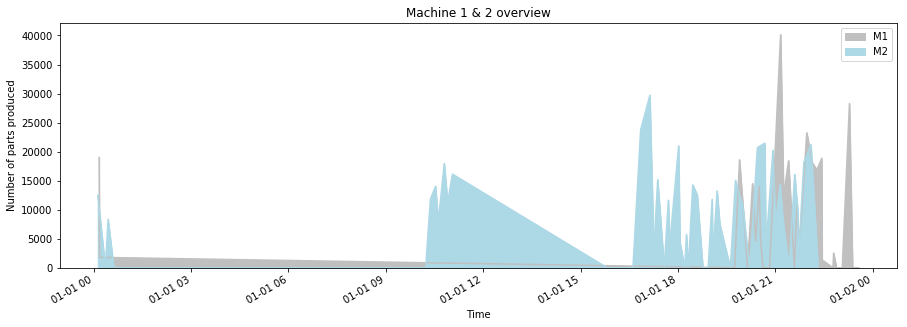

In [16]:
ts = pd.Series(pt1_M1.NumberOfPieces,index=pt1_M1.index)
ts2 = pd.Series(pt1_M2.NumberOfPieces,index=pt1_M2.index)
ts.plot.area(figsize=(15,5), label='M1', color='silver')
ts2.plot.area(figsize=(15,5),label='M2', color='lightblue')
plt.legend(loc='best')
plt.title('Machine 1 & 2 overview')
plt.ylabel('Number of parts produced')
plt.show()

From what I can understand form the plot is that Machine 2 was primarily used over a longer period was as Machine 1 was used less / also in shorter bursts.

### Question 2: How do the 3 parts (P1, P2, P3) compare in terms of production complexity, based on this one day's data?

In [17]:
P1 = data.loc[data['Part']=='P1']
P2 = data.loc[data['Part']=='P2']
P3 = data.loc[data['Part']=='P3']

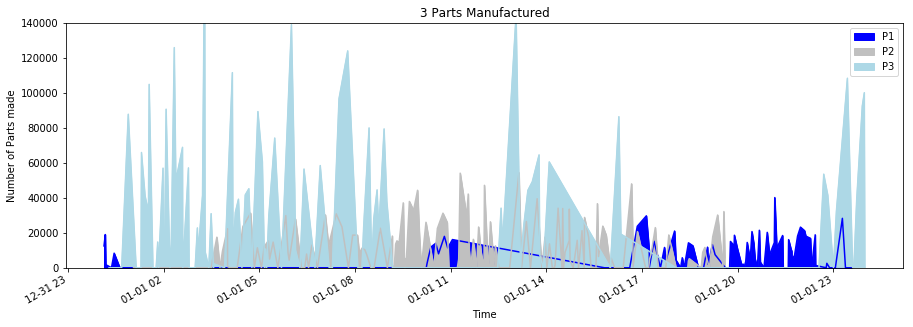

In [18]:
tsp1 = pd.Series(P1.NumberOfPieces,index=P1.index)
tsp2 = pd.Series(P2.NumberOfPieces,index=P2.index)
tsp3 = pd.Series(P3.NumberOfPieces,index=P3.index)
tsp1.plot.area(figsize=(15,5), label='P1', color='blue')
tsp2.plot.area(figsize=(15,5),label='P2', color='silver')
tsp3.plot.area(figsize=(15,5),label='P3', color='lightblue')
plt.legend(loc='best')
plt.title('3 Parts Manufactured')
plt.ylim(0,140000)
plt.ylabel('Number of Parts made')
plt.show()

From this view I can’t tell witch machine produced what, but I can tell that Part 1 was produced throughout the time. That Part 2 was initially produced slowly (most likely sorting out production errors) and then production ramped up of this part. And that Part 3 was only put into production at the midpoint and was produced the most in a very short period.

### Question 3: How do the 5 operators compare, in terms of their individual production rates?

Finding the 5 opperators in the data

In [19]:
def Ops_Output(PN):
    
    Part_Number = [PN.loc[PN['Operator']=='Op_1'].NumberOfPieces.sum(),
    PN.loc[PN['Operator']=='Op_2'].NumberOfPieces.sum(),
    PN.loc[PN['Operator']=='Op_3'].NumberOfPieces.sum(),
    PN.loc[PN['Operator']=='Op_4'].NumberOfPieces.sum(),
    PN.loc[PN['Operator']=='Op_5'].NumberOfPieces.sum()]
    
    return Part_Number

In [20]:
Part1 = Ops_Output(P1)
Part2 = Ops_Output(P2)
Part3 = Ops_Output(P3)

Plot the 5 opperators

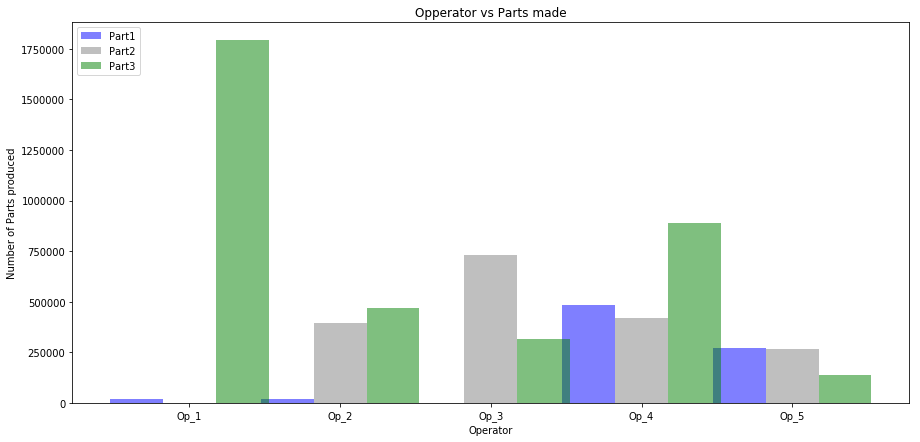

In [21]:
n_groups = 5
 
# create plot
fig, ax = plt.subplots(figsize=(15,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5
 
pt1 = plt.bar(index, Part1, bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Part1')
 
pt2 = plt.bar(index + bar_width, Part2, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Part2')

pt3 = plt.bar(index + bar_width+bar_width, Part3, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Part3')
 
plt.xlabel('Operator')
plt.ylabel('Number of Parts produced')
plt.title('Opperator vs Parts made')
plt.xticks(index + bar_width, ('Op_1', 'Op_2', 'Op_3', 'Op_4','Op_5'))
plt.legend(loc=2)

From the table above I can tell that Opperator 5 was the most productive.

In [22]:
Stoptype = [item for item in data['StopType'].unique()]

In [23]:
print(Stoptype)

['Run', 'ChangeOver', 'OpStop', 'Alarm']


Finding the different Stop types for Machine 1

In [24]:
def stops(PN):
    
    stp = [PN.loc[PN['Machine']=='M1'][PN['StopType']=='Run'].StopType.count(),
           PN.loc[PN['Machine']=='M1'][PN['StopType']=='Alarm'].StopType.count(),
           PN.loc[PN['Machine']=='M1'][PN['StopType']=='ChangeOver'].StopType.count(),
           PN.loc[PN['Machine']=='M1'][PN['StopType']=='OpStop'].StopType.count()          
          ]
    
    return stp

In [25]:
Part1_stops = stops(P1)
Part2_stops = stops(P2)
Part3_stops = stops(P3)

C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


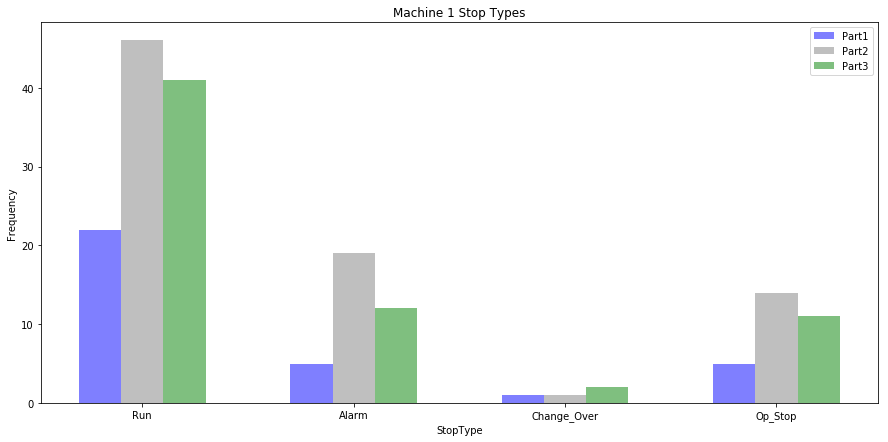

In [26]:
n_groups = 4
 
# create plot
fig, ax = plt.subplots(figsize=(15,7))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.5
 
pt1 = plt.bar(index, Part1_stops, bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Part1')
 
pt2 = plt.bar(index + bar_width, Part2_stops, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Part2')

pt3 = plt.bar(index + bar_width+bar_width, Part3_stops, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Part3')
 
plt.xlabel('StopType')
plt.ylabel('Frequency')
plt.title('Machine 1 Stop Types')
plt.xticks(index + bar_width, ('Run', 'Alarm','Change_Over','Op_Stop'))
plt.legend(loc=0)

Finding the different Stop types for Machine 2

In [27]:
def stops(PN):
    
    stp = [PN.loc[PN['Machine']=='M2'][PN['StopType']=='Run'].StopType.count(),
           PN.loc[PN['Machine']=='M2'][PN['StopType']=='Alarm'].StopType.count(),
           PN.loc[PN['Machine']=='M2'][PN['StopType']=='ChangeOver'].StopType.count(),
           PN.loc[PN['Machine']=='M2'][PN['StopType']=='OpStop'].StopType.count()          
          ]
    
    return stp

In [28]:
Part21_stops = stops(P1)
Part22_stops = stops(P2)
Part23_stops = stops(P3)

C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


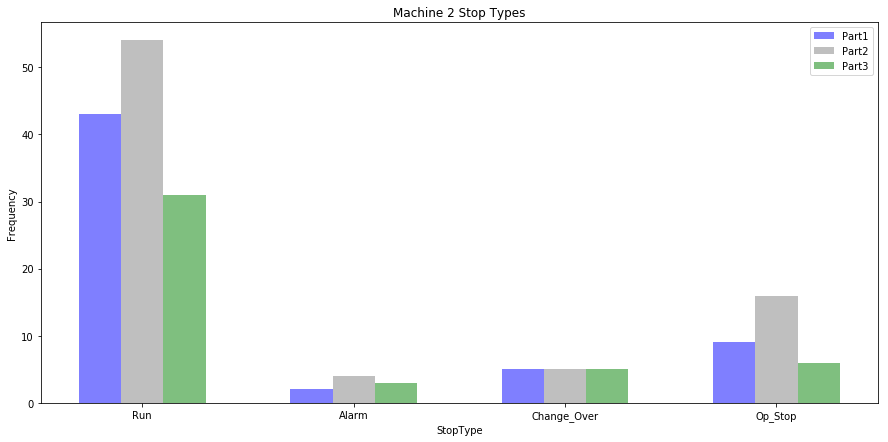

In [29]:
n_groups = 4
 
# create plot
fig, ax = plt.subplots(figsize=(15,7))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.5
 
pt1 = plt.bar(index, Part21_stops, bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Part1')
 
pt2 = plt.bar(index + bar_width, Part22_stops, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Part2')

pt3 = plt.bar(index + bar_width+bar_width, Part23_stops, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Part3')
 
plt.xlabel('StopType')
plt.ylabel('Frequency')
plt.title('Machine 2 Stop Types')
plt.xticks(index + bar_width, ('Run', 'Alarm','Change_Over','Op_Stop'))
plt.legend(loc=0)

From the two graphs of Machine 1 & 2 I can see that Machine 1 had overall more run condition for all three parts made, whereas Machine 2 had a similar scenario but had an exception with regards to part 3. What I can also tell is that Machine 1 had view Alarm, Change Overs and Operation Stops when compared to machine 2

### Question 4: What is the actual realized production rate, when taking into account all the stoppages?

Part 1,2,3 run rates

In [30]:
total_P1_run = Part1_stops[0]+Part21_stops[0]
total_P2_run = Part2_stops[0]+Part22_stops[0]
total_P3_run = Part3_stops[0]+Part23_stops[0]

Part 1,2,3 stops

In [31]:
total_part1_stops = Part1_stops[1]+Part21_stops[1]+Part1_stops[2]+Part21_stops[2]+Part1_stops[3]+Part21_stops[3]
total_part2_stops = Part2_stops[1]+Part22_stops[1]+Part2_stops[2]+Part22_stops[2]+Part2_stops[3]+Part22_stops[3]
total_part3_stops = Part3_stops[1]+Part23_stops[1]+Part3_stops[2]+Part23_stops[2]+Part3_stops[3]+Part23_stops[3]

Totals

In [32]:
Part1_tot = total_P1_run+total_part1_stops
Part2_tot = total_P2_run+total_part2_stops
Part3_tot = total_P3_run+total_part3_stops

Productivity in percentage conversion

In [33]:
p1_prod = np.divide(float(total_P1_run),float(Part1_tot))*100
p2_prod = np.divide(float(total_P2_run),float(Part2_tot))*100
p3_prod = np.divide(float(total_P3_run),float(Part3_tot))*100

In [34]:
print('Part 1 productivity: ',p1_prod)
print('Part 2 productivity: ',p2_prod)
print('Part 3 productivity: ',p3_prod)

Part 1 productivity:  70.652173913
Part 2 productivity:  62.893081761
Part 3 productivity:  64.8648648649


Try to figure out the parts per hour produced

In [35]:
print('Part 1 = '+''+str((data.loc[data['Part']=='P1'].NumberOfPieces.sum())/24)+' per hour');
print('Part 2 = '+''+str((data.loc[data['Part']=='P2'].NumberOfPieces.sum())/24)+' per hour');
print('Part 3 = '+''+str((data.loc[data['Part']=='P3'].NumberOfPieces.sum())/24)+' per hour');

Part 1 = 33106.625 per hour
Part 2 = 75426.0416667 per hour
Part 3 = 149989.125 per hour


Part 2 was the most produced part. this could have been because Opperator 5 made more of this one part when compared to the other two parts. It seemed like Opperator 5 worked more when compared to the other Opperators.